In [1]:
import sys
print("Python version used in this project:", sys.version)

Python version used in this project: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib

In [5]:
!pip install odfpy

     ---------------------------------------- 0.0/717.0 kB ? eta -:--:--
      --------------------------------------- 10.2/717.0 kB ? eta -:--:--
     -- ---------------------------------- 41.0/717.0 kB 326.8 kB/s eta 0:00:03
     ---- -------------------------------- 81.9/717.0 kB 508.4 kB/s eta 0:00:02
     ------ ----------------------------- 122.9/717.0 kB 599.1 kB/s eta 0:00:01
     ----------- ------------------------ 235.5/717.0 kB 958.6 kB/s eta 0:00:01
     --------------- ---------------------- 286.7/717.0 kB 1.1 MB/s eta 0:00:01
     ------------------- ------------------ 368.6/717.0 kB 1.2 MB/s eta 0:00:01
     ------------------------ ------------- 471.0/717.0 kB 1.3 MB/s eta 0:00:01
     ------------------------ ------------- 471.0/717.0 kB 1.3 MB/s eta 0:00:01
     ---------------------------- --------- 532.5/717.0 kB 1.1 MB/s eta 0:00:01
     -------------------------------------  716.8/717.0 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 717.0/717

In [6]:
file_path = r"C:\Users\Usuário\CCPP\Folds5x2_pp.ods"
df = pd.read_excel(file_path)

In [7]:
df.head(11)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
display(df.describe())

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


<Figure size 1200x600 with 0 Axes>

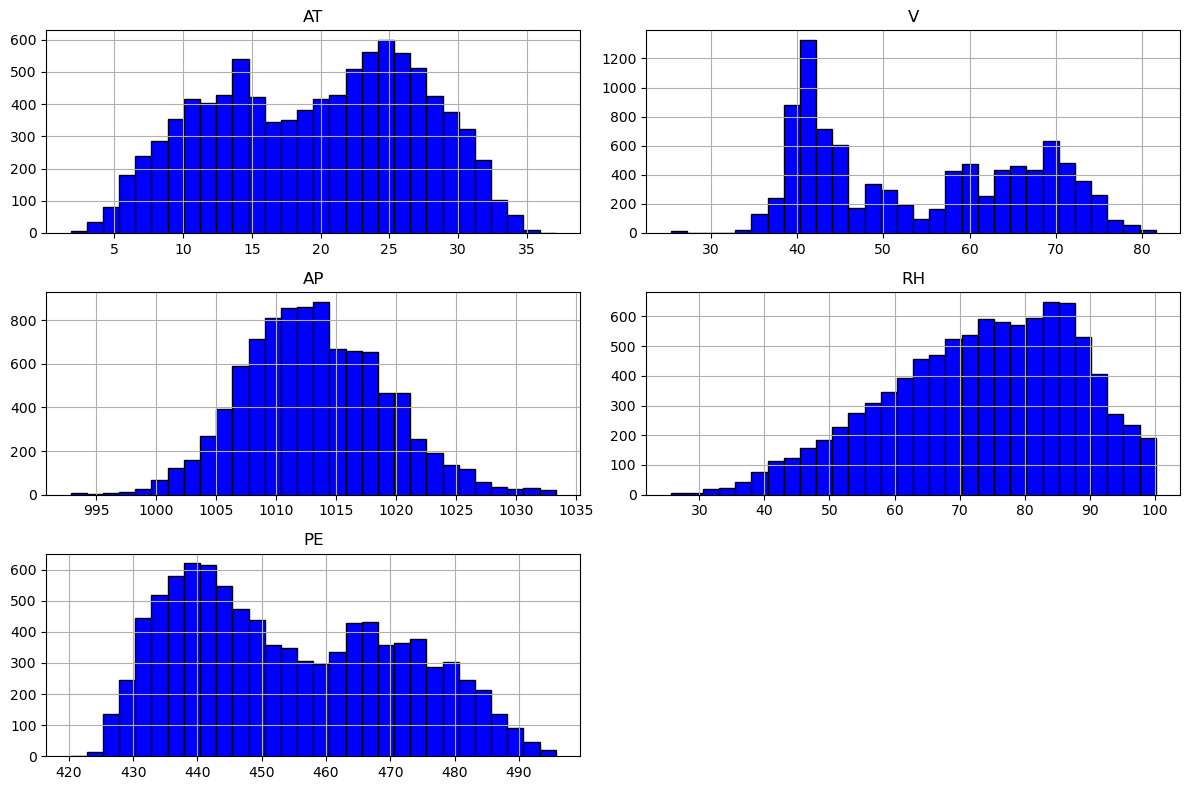

In [12]:
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 8), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

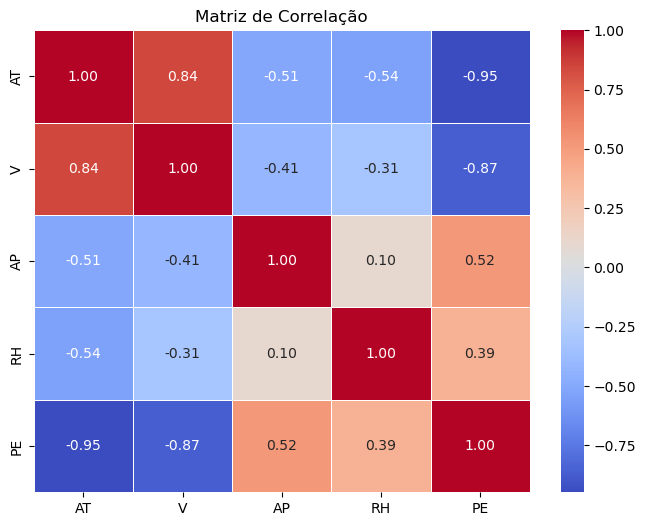

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

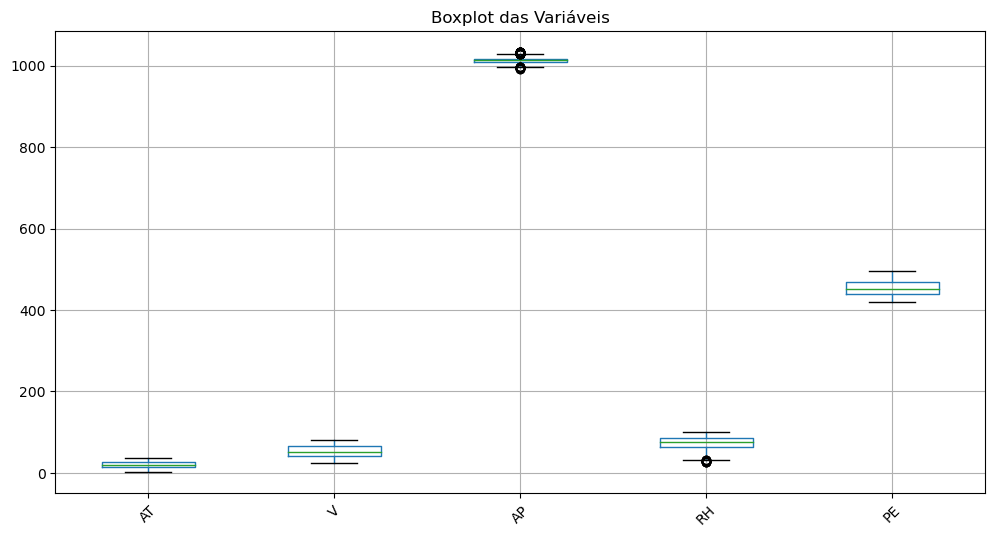

In [14]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot das Variáveis")
plt.show()

In [15]:
X = df.drop(columns=["PE"])  
y = df["PE"]  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr_model = LinearRegression()  
lr_model.fit(X_train, y_train)  
y_pred_lr = lr_model.predict(X_test)

In [22]:
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Calculando o erro médio quadrático
r2_lr = r2_score(y_test, y_pred_lr)  # Calculando o coeficiente R²

print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}")

Regressão Linear - MSE: 20.27, R²: 0.9301


In [24]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)  
y_pred_rf = rf_model.predict(X_test)

In [25]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")

Random Forest - MSE: 10.54, R²: 0.9637


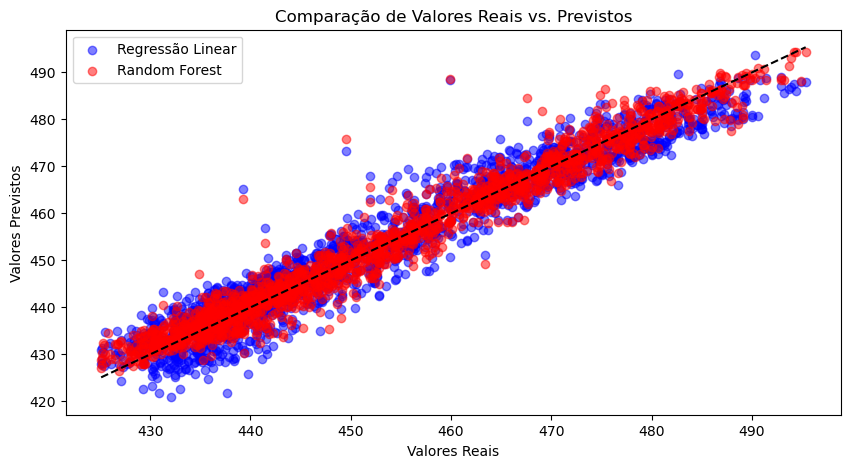

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regressão Linear", color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Comparação de Valores Reais vs. Previstos")
plt.legend()
plt.show()


In [29]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)

In [30]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred_xgb = xgb_model.predict(X_test)

In [32]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}")

XGBoost - MSE: 10.43, R²: 0.9640


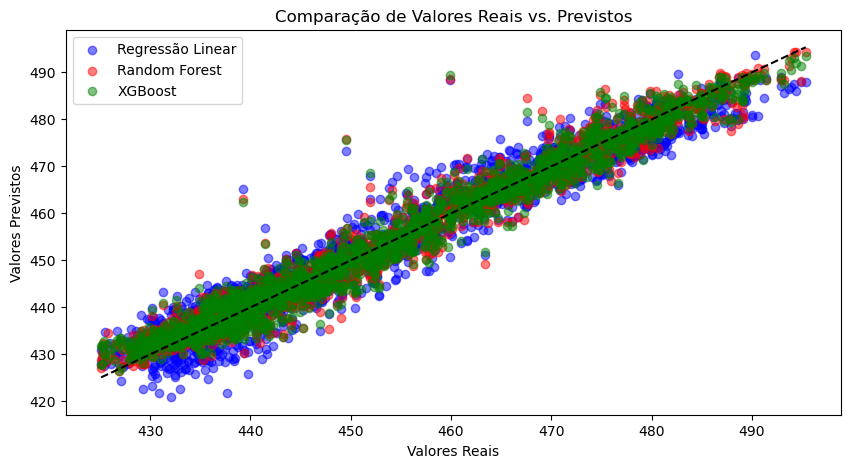

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regressão Linear", color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='red')
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost", color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Comparação de Valores Reais vs. Previstos")
plt.legend()
plt.show()


In [34]:
print("\nRelatório Final")
print("===========================")
print(f"Regressão Linear - MSE: {mse_lr:.2f}, R²: {r2_lr:.4f}")
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}")
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.4f}")

melhor_modelo = "XGBoost" if r2_xgb > r2_rf and r2_xgb > r2_lr else ("Random Forest" if r2_rf > r2_lr else "Regressão Linear")
print(f"\nMelhor modelo: {melhor_modelo}")

print("\nConclusão:")
print("- O modelo XGBoost apresentou o melhor desempenho, com menor erro e maior precisão.")
print("- A Regressão Linear teve um desempenho inferior, o que indica que os dados possuem padrões não lineares.")
print("- Random Forest também teve um bom desempenho, mas ficou atrás do XGBoost.")



Relatório Final
Regressão Linear - MSE: 20.27, R²: 0.9301
Random Forest - MSE: 10.54, R²: 0.9637
XGBoost - MSE: 10.43, R²: 0.9640

Melhor modelo: XGBoost

Conclusão:
- O modelo XGBoost apresentou o melhor desempenho, com menor erro e maior precisão.
- A Regressão Linear teve um desempenho inferior, o que indica que os dados possuem padrões não lineares.
- Random Forest também teve um bom desempenho, mas ficou atrás do XGBoost.


In [38]:
if melhor_modelo == "XGBoost":
    joblib.dump(xgb_model, "modelo_xgboost.pkl")
elif melhor_modelo == "Random Forest":
    joblib.dump(rf_model, "modelo_random_forest.pkl")
else:
    joblib.dump(lr_model, "modelo_regressao_linear.pkl")

print("\nModelo salvo com sucesso!")



Modelo salvo com sucesso!
